<h1>UK ROAD ACCIDENT ACTIVITY</h1>
<hr>
<h3>DATA ANALYST: KYLA MAE A. CANTOS | BSIT 3A</h3>

In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

In [2]:
accident = pd.read_csv('datasets//uk_road_accident.csv')
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1>1. What is the distribution of accident severities?</h1>

In [3]:
AcciSeverity = accident['Accident_Severity'].value_counts()
AcciSeverity

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h1>Insight # 1. You can see it shows the frequency of each severity level</h1>

In [4]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

<h1>2. Which day of the week has the highest number of accidents?</h1>

In [5]:
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek
day_counts = accident['DayOfWeek'].value_counts()
day_counts

DayOfWeek
5.0    43164
2.0    40037
4.0    39822
3.0    39641
1.0    38714
6.0    35065
0.0    28564
Name: count, dtype: int64

<h1>Insight # 2. It identifies the 5th day is with the most accidents.</h1>

<h1>3. What is the average number of vehicles involved in accidents?</h1>

In [6]:
avg_vehicles = accident['Number_of_Vehicles'].mean()
avg_vehicles

np.float64(1.8312554205597575)

<h1>Insight # 3. 1.8 is the averagae vehicle count per accident.</h1>

<h1>4. What are the most common types of vehicles involved in accidents?</h1>

In [7]:
vehivle_type = accident['Vehicle_Type'].value_counts()
vehivle_type

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

<h1>Insight # 4. In the lists, car is the most frequent vehicle types in accidents.</h1>

<h1>5. Are there specific road conditions that are more prone to accidents?</h1>

In [8]:
road_condition = accident['Road_Surface_Conditions'].value_counts()
road_condition

Road_Surface_Conditions
Dry                     447821
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
Name: count, dtype: int64

<h1>Insight 5. It shows dry road condition are the most prone to accidents.</h1>

<h1>6. Is there a trend in the number of accidents over the years?</h1>

In [9]:
accident['Year'] = accident['Accident Date'].dt.year
year = accident['Year'].value_counts()
year

Year
2019.0    71867
2020.0    70163
2021.0    66172
2022.0    56805
Name: count, dtype: int64

<h1>Insight # 6. It displays the number of accidents per year.</h1>

<h1>7. What is the distribution of the number of casualties per accident?</h1>

In [10]:
casualty_distri = accident["Number_of_Casualties"].value_counts()
casualty_distri

Number_of_Casualties
1     504041
2     107971
3      30776
4      11156
5       4123
6       1525
7        539
8        214
9        112
10        58
11        36
13        24
12        21
14        13
15        11
17         8
19         7
16         7
18         6
22         5
21         4
29         3
40         2
28         2
24         2
27         2
42         2
25         1
32         1
68         1
45         1
62         1
47         1
48         1
26         1
43         1
Name: count, dtype: int64

<h1>Insight # 7. It shows how many casualties had</h1>

<h1>8 How does the number of casualties vary with the number of vehicles involved?</h1>

In [11]:
vehicle_casual = accident['Number_of_Vehicles'].corr(accident['Number_of_Casualties'])
vehicle_casual

np.float64(0.22888886126927557)

<h1>Insight # 8, It shows 0 little to no correlation. </h1>

<h1>9. What is the distribution of accidents across different road types?</h1>

In [12]:
Road_type = accident['Road_Type'].value_counts()
Road_type

Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Name: count, dtype: int64

<h1>Insight # 9. It shows the frequency of accidents for each road type and Single Carriageway has the highest number.</h1>

<h1>10. Which weather condition is the most associated with accidents?</h1>

In [13]:
weather = accident['Weather_Conditions'].value_counts()
weather

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<h1>Insight # 10. You can see the lists of the most frequent weather conditions during accidents and Fine no high winds has the highest number.</h1>

<h1>11. Which has the highest number between the two, rural or urban?</h1>

In [14]:
area = accident['Urban_or_Rural_Area'].value_counts()
area

Urban_or_Rural_Area
Urban          421663
Rural          238990
Unallocated        11
Name: count, dtype: int64

<h1>Insight # 11. It shows that the Urban has the highest rate of accidents.</h1>

<h1>12. How are accidents distributed across different light conditions?</h1>

In [15]:
light_condi = accident['Light_Conditions'].value_counts()
light_condi

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h1> Insight # 12.It is shown here that daylight has more frequent accidents.</h1>

<h1>13. What specific district areas with higher accident frequencies?</h1>

In [16]:
areas = accident['District Area'].unique()
areas

array(['Kensington and Chelsea', 'Westminster', 'Richmond upon Thames',
       'Hammersmith and Fulham', 'Hounslow', 'Tower Hamlets',
       'City of London', 'Southwark', 'Camden', 'Hackney', 'Islington',
       'Barnet', 'Brent', 'Haringey', 'Merton', 'Ealing', 'Enfield',
       'Greenwich', 'Newham', 'London Airport (Heathrow)', 'Hillingdon',
       'Waltham Forest', 'Redbridge', 'Barking and Dagenham', 'Bromley',
       'Havering', 'Croydon', 'Lambeth', 'Wandsworth', 'Sutton', 'Bexley',
       'Lewisham', 'Harrow', 'Kingston upon Thames', 'Barrow-in-Furness',
       'South Lakeland', 'Carlisle', 'Eden', 'Allerdale', 'Copeland',
       'Fylde', 'Blackpool', 'Wyre', 'Lancaster', 'Chorley',
       'West Lancashire', 'South Ribble', 'Preston',
       'Blackburn with Darwen', 'Hyndburn', 'Ribble Valley', 'Burnley',
       'Pendle', 'Rossendale', 'Wirral', 'Liverpool', 'Sefton',
       'Knowsley', 'St. Helens', 'Manchester', 'Salford', 'Tameside',
       'Stockport', 'Bolton', 'Wigan', '

In [17]:
Dist_Areas = accident['District Area'].value_counts()
Dist_Areas

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

<h1>Insight # 13. It shows that Birmingham has the higher accident frequencies</h1>

<h1>14. What is the correlation between latitude and longitude?</h1>

In [18]:
lat_lon_corr = accident['Latitude'].corr(accident['Longitude'])
lat_lon_corr

np.float64(-0.3981136594753895)

<h1>Insight # 14. It shows 0 it means there is no correlation Longitude and Latitude.</h1>

<h1>15. What is the accident count trend over months?</h1>

In [19]:
accident['Month'] = accident['Accident Date'].dt.month
month = accident['Month'].value_counts()
month

Month
11.0    24240
12.0    24156
10.0    23962
7.0     22939
9.0     22558
2.0     22264
6.0     22196
3.0     21824
5.0     21723
8.0     21106
4.0     19787
1.0     18252
Name: count, dtype: int64

<h1>Insight # 15. It Shows the number of accidents per month and 11th month or month of November has the highest number of accidents.</h1>

<h1>16. What is the average number of vehicles involved in accidents in urban vs. rural areas?</h1>

In [20]:
avg_vehicle_ByArea = accident.groupby('Urban_or_Rural_Area')['Number_of_Vehicles'].mean()
avg_vehicle_ByArea

Urban_or_Rural_Area
Rural          1.866312
Unallocated    1.909091
Urban          1.811394
Name: Number_of_Vehicles, dtype: float64

<h1>Insight # 16. It shows the average number of vehicles involved in accidents in urban and rural areas.</h1>

<h1>17. What is the distribution of light conditions for each accident severity level?</h1>

In [21]:
gr_counts = accident.groupby(['Light_Conditions','Accident_Severity']).size()
gr_counts

Light_Conditions             Accident_Severity
Darkness - lighting unknown  Fatal                    68
                             Serious                 794
                             Slight                 5622
Darkness - lights lit        Fatal                  1860
                             Serious               19130
                             Slight               108345
Darkness - lights unlit      Fatal                    45
                             Serious                 360
                             Slight                 2138
Darkness - no lighting       Fatal                  1612
                             Serious                7174
                             Slight                28651
Daylight                     Fatal                  5076
                             Serious               60759
                             Slight               419045
dtype: int64

<h1>Insight # 17. It displays how accident severity is distributed across different light conditions.</h1>

<h1>18. How does the average number of vehicles involved vary by weather condition?</h1>

In [22]:
avg_vehicle_ByWeather = accident.groupby('Weather_Conditions')['Number_of_Vehicles'].mean()
avg_vehicle_ByWeather

Weather_Conditions
Fine + high winds        1.779401
Fine no high winds       1.836809
Fog or mist              1.807823
Other                    1.777668
Raining + high winds     1.777951
Raining no high winds    1.831610
Snowing + high winds     1.737853
Snowing no high winds    1.754889
Name: Number_of_Vehicles, dtype: float64

<h1>Insight # 18. It Shows the average number of vehicles involved in accidents under different weather conditions.</h1>

<h1>19. What is the distribution of accident severity by weather conditions?</h1>

In [23]:
group_counts = accident.groupby(['Weather_Conditions','Accident_Severity']).size()
group_counts

Weather_Conditions     Accident_Severity
Fine + high winds      Fatal                   175
                       Serious                1245
                       Slight                 7134
Fine no high winds     Fatal                  7100
                       Serious               72046
                       Slight               441739
Fog or mist            Fatal                    82
                       Serious                 483
                       Slight                 2963
Other                  Fatal                   165
                       Serious                1801
                       Slight                15184
Raining + high winds   Fatal                   145
                       Serious                1261
                       Slight                 8209
Raining no high winds  Fatal                   848
                       Serious                9468
                       Slight                69380
Snowing + high winds   Fatal             

<h1>Insight # 19. It Displays how accident severity is distributed across different weather conditions.</h1>

<h1>20. What are the most common vehicle types involved in accidents in urban areas?</h1>

In [24]:
urban_accidents = accident[accident['Urban_or_Rural_Area'] == 'Urban']
vehicle_urban = urban_accidents['Vehicle_Type'].value_counts()
vehicle_urban

Vehicle_Type
Car                                      316053
Van / Goods 3.5 tonnes mgw or under       22003
Bus or coach (17 or more pass seats)      16850
Motorcycle over 500cc                     16700
Goods 7.5 tonnes mgw and over             11151
Motorcycle 125cc and under                10246
Taxi/Private hire car                      8612
Motorcycle over 125cc and up to 500cc      4982
Motorcycle 50cc and under                  4893
Goods over 3.5t. and under 7.5t            3864
Other vehicle                              3643
Agricultural vehicle                       1272
Minibus (8 - 16 passenger seats)           1258
Pedal cycle                                 127
Data missing or out of range                  6
Ridden horse                                  3
Name: count, dtype: int64

<h1>Insight # 20. In the lists car type of vehicle has the most accidents in urban areas.</h1>

In [39]:
import matplotlib.pyplot as plt

<h1>21. How does the average number of casualties vary by road type? </h1>

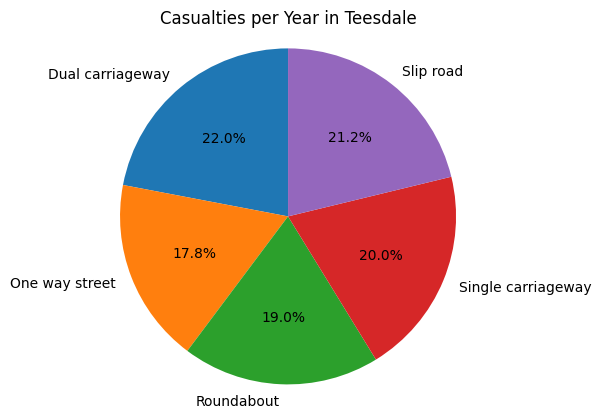

In [40]:
avg_casualties_ByRoad = accident.groupby('Road_Type')['Number_of_Casualties'].mean()
avg_casualties_ByRoad.plot(kind='pie', autopct='%1.1f%%', startangle=90,ylabel='', title='Casualties per Year in Teesdale')
plt.axis('equal') 
plt.show()

<h1>Insight # 21. It shows the average number of casualties for each road type, indicating which road types are associated with more severe accidents.</h1>

<h1>22. How many accidents occur in the City of London each year??</h1>

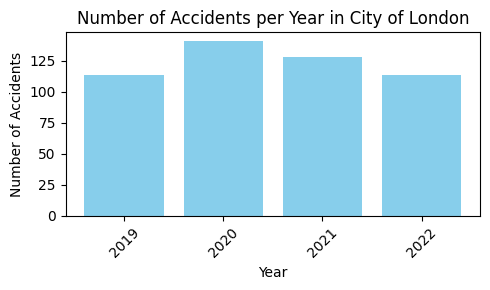

In [48]:
city_df = accident[accident['District Area'] == 'City of London']
city_df['Year'] = accident['Accident Date'].dt.year
accidents_per_year = city_df.groupby('Year').size()

plt.figure(figsize=(5, 3))
plt.bar(accidents_per_year.index, accidents_per_year.values, color='skyblue')

plt.xticks(accidents_per_year.index, rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Year in City of London')
plt.tight_layout()
plt.show()

<h1>Insight # 22. It shows the accident in City of London Every Year.</h1>

<h1>23. what type of vehicle has the highest number in accident in district area of Clackmannanshire?</h1>

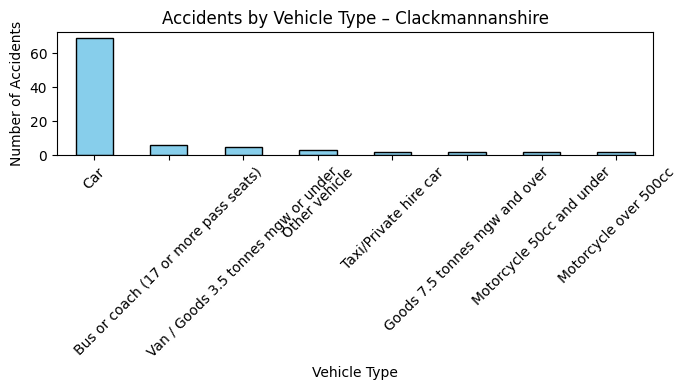

In [49]:
clack_df = accident[accident['District Area'] == 'Clackmannanshire']
vehicle_type = clack_df['Vehicle_Type'].value_counts()
vehicle_type

plt.figure(figsize=(7,4))
vehicle_type.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Accidents by Vehicle Type – Clackmannanshire')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1>Insight 23. It shows here that the ype of vehicle has the highest number in accident in district area of Clackmannanshire </h1>

<h1>24. What Year has the lowest record of accident in Manchester?</h1>

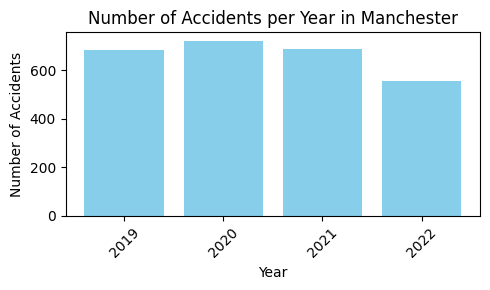

In [43]:
district = accident[accident['District Area'] == 'Manchester']
district['Year'] = district['Accident Date'].dt.year
accidents_per_year = district.groupby('Year').size()

plt.figure(figsize=(5, 3))
plt.bar(accidents_per_year.index, accidents_per_year.values, color='skyblue')

plt.xticks(accidents_per_year.index, rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Year in Manchester')
plt.tight_layout()
plt.show()


<h1>Insight # 24. It shows here the year 2022 has the lowest record of accident in Manchester witht the number 555.</h1>

<hr>
<h1>25. What year has the highest number of casualties in Teesdale?</h1>

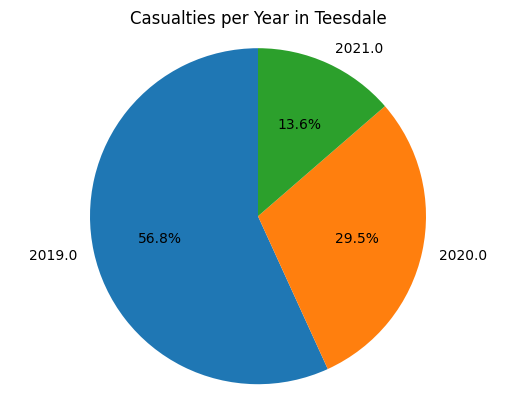

In [44]:
import matplotlib.pyplot as plt

teesdale_df = accident[accident['District Area'] == 'Teesdale']
teesdale_df['Year'] = teesdale_df['Accident Date'].dt.year
casualties_per_year = teesdale_df.groupby('Year')['Number_of_Casualties'].sum()

casualties_per_year.plot(kind='pie', autopct='%1.1f%%', startangle=90,ylabel='', title='Casualties per Year in Teesdale')
plt.axis('equal') 
plt.show()


<h1>Insight # 25. It shows here the number of casualties in Teesdale in 3 years and 2019 has the highest number of casualties</h1>